# Predicting Delivery Time on Zomato Dataset

We have Zomato's Dataset including variables like Location, Cuisines, Minimum order, Rating, etc. 

Our objective is to predict Delivery Time. All the variables mentioned here are self explanatory.

In [41]:
import warnings  # to ignore the warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd
zomato = pd.read_excel('C:/Users/Rohit/Desktop/Py Datasets/Data_Train.xlsx')

In [43]:
zomato.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [44]:
zomato.shape

(11094, 9)

In [45]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


### Pre processing the data

The following variables are string and before converting them to int we strip some text values:

In [46]:
zomato['Average_Cost'] = zomato['Average_Cost'].map(lambda x: x.lstrip('₹'))
zomato['Minimum_Order'] = zomato['Minimum_Order'].map(lambda x: x.lstrip('₹'))
zomato['Delivery_Time'] = zomato['Delivery_Time'].str.replace(' minutes', '')

Plucking the City names from the entire address for ease of further processing:

In [47]:
zomato['City.Pune']= zomato['Location'].apply(lambda x: 'Pune' if 'Pune' in x else None)
zomato['City.Mumbai']= zomato['Location'].apply(lambda x: 'Mumbai' if 'Mumbai' in x else None)
zomato['City.Kolkata']= zomato['Location'].apply(lambda x: 'Kolkata' if 'Kolkata' in x else None)
zomato['City.Bangalore']= zomato['Location'].apply(lambda x: 'Bangalore' if 'Bangalore' in x else None)
zomato['City.Delhi']= zomato['Location'].apply(lambda x: 'Delhi' if 'Delhi' in x else None)
zomato['City.Hyderabad']= zomato['Location'].apply(lambda x: 'Hyderabad' if 'Hyderabad' in x else None)
zomato['City.Noida']= zomato['Location'].apply(lambda x: 'Noida' if 'Noida' in x else None)
zomato['City.Gurgaon']= zomato['Location'].apply(lambda x: 'Gurgaon' if 'Gurgaon' in x else None)
zomato['City.Majestic']= zomato['Location'].apply(lambda x: 'Bangalore' if 'Majestic' in x else None)
zomato['City.Marathalli']= zomato['Location'].apply(lambda x: 'Bangalore' if 'Marathalli' in x else None)
zomato['City.Electronic']= zomato['Location'].apply(lambda x: 'Bangalore' if 'Electronic' in x else None)
zomato['City.Whitefield']= zomato['Location'].apply(lambda x: 'Bangalore' if 'Whitefield' in x else None)
zomato['City.Gurgoan']= zomato['Location'].apply(lambda x: 'Gurgaon' if 'Gurgoan' in x else None)

Creating a new column named city and adding the city names created above:

In [48]:
zomato['City'] = zomato['City.Pune'].map(str)+zomato['City.Kolkata'].map(str)+\
                              zomato['City.Mumbai'].map(str)+zomato['City.Bangalore'].map(str)+\
                              zomato['City.Delhi'].map(str)+zomato['City.Hyderabad'].map(str)+\
                              zomato['City.Noida'].map(str)+zomato['City.Gurgaon'].map(str)+\
                              zomato['City.Majestic'].map(str)+\
                              zomato['City.Marathalli'].map(str)+zomato['City.Electronic'].map(str)+\
                              zomato['City.Gurgoan'].map(str)+zomato['City.Whitefield'].map(str)

In [49]:
# as the corresponding city name's coloumn as created as an encoded variable it has NAs too, hence we do the following
zomato['City'] = zomato['City'].apply(lambda x: x.replace('None', ''))
# i.e. we replace 

In [50]:
zomato.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'City.Pune',
       'City.Mumbai', 'City.Kolkata', 'City.Bangalore', 'City.Delhi',
       'City.Hyderabad', 'City.Noida', 'City.Gurgaon', 'City.Majestic',
       'City.Marathalli', 'City.Electronic', 'City.Whitefield', 'City.Gurgoan',
       'City'],
      dtype='object')

Now let's create another dataset which only has significant variables(columns):

In [51]:
zomato1 = zomato[['Cuisines', 'Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'City']]

In [52]:
zomato1.isnull().sum()

Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
City             0
dtype: int64

Counting the number od cuisines instead of what cuisines were ordered each time as every order will be different:

In [53]:
def count(s):
    a = s.split(',')
    return len(a)

We have created a function above which will split the comma seperated values in the variable 'Cuisines'.

This function will make a list of these values and give back its length hence giving us no. of cuisines ordered

In [54]:
# creating a new variable
zomato1['Count_Cuisine'] = zomato1['Cuisines'].apply(lambda x: count(x))

Now we convert some of the string variables containing numbers to numeric form:

In [55]:
cols = ['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Delivery_Time']
zomato1[cols] = zomato1[cols].apply(pd.to_numeric, errors='coerce')
# here the extra argument (errors='coerce') is added because it will make any other value other than a number to NA

In [56]:
zomato1.isnull().sum()

Cuisines            0
Average_Cost       25
Minimum_Order       0
Rating           1963
Votes            2074
Reviews          2312
Delivery_Time       0
City                0
Count_Cuisine       0
dtype: int64

Now we fill the NAs:

In [57]:
zomato1['Average_Cost'] = zomato1['Average_Cost'].fillna(zomato1['Average_Cost'].median())
zomato1['Rating'] = zomato1['Rating'].fillna(zomato1['Rating'].median())
zomato1['Votes'] = zomato1['Votes'].fillna(zomato1['Votes'].median())
zomato1['Reviews'] = zomato1['Reviews'].fillna(zomato1['Reviews'].median())

In [58]:
zomato1.isnull().sum()  # NAs removed

Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
City             0
Count_Cuisine    0
dtype: int64

# Visualization

Checking the Cities against the no. of orders:

Text(0.5,1,'City vs No. of Orders')

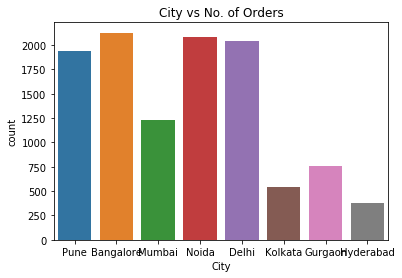

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(zomato1['City'])
plt.title('City vs No. of Orders')
# No. of orders because some restaurants are repeated in the same city. 
# Hence we cant consider them as different orders from different restaurants.

As we can see the no. of highest orders are in Banglore, Pune, Noida and Delhi

Checking the Delivery Time estimates overall of all the restaurants:

Text(0.5,1,'Delivery time estimates')

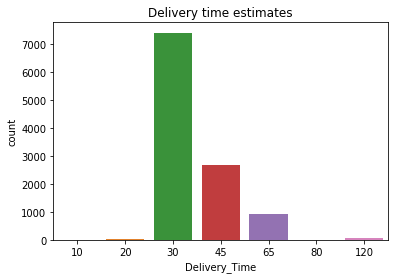

In [60]:
sns.countplot(zomato1['Delivery_Time'])
plt.title('Delivery time estimates')

We can observe here that most of the hotels are efficient at delivering food within 30 minutes while very few are more effcient than that. Also we observe the poor delivery time of some hotels as 120 minutes.

Checking whether Minimum order affects Delivery time or not:

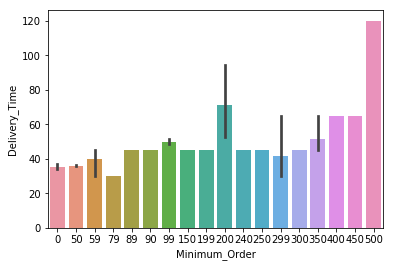

In [61]:
sns.barplot(x='Minimum_Order', y='Delivery_Time', data=zomato1)

We can conclude that orders costing below Rs.200 took less than an hour to deliver. While above 400 took a bit more time that that. Which can probably mean that those orders might have many items.

<Figure size 720x14400 with 0 Axes>

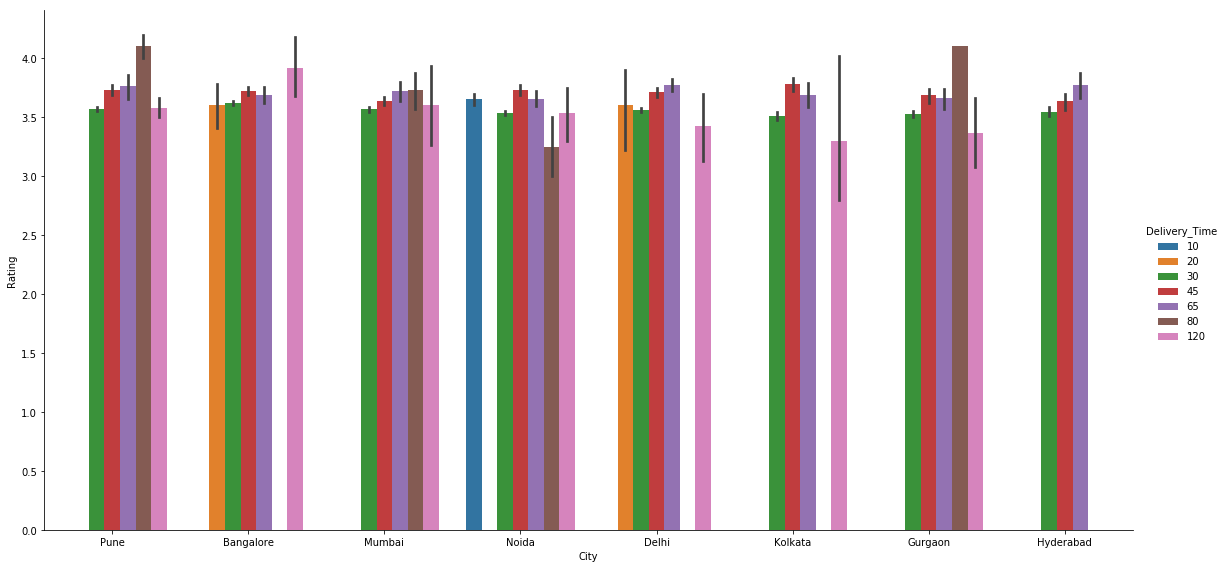

In [62]:
plt.figure(figsize=(10,200))
sns.factorplot(x='City', y='Rating',hue='Delivery_Time' ,kind='bar', data=zomato1, height=8, aspect=2)

It is strange yet concluding that the orders which got delivered under 30 mins have 3.5 or less rating where as the hotels which took almost too long to deliver have a 4star rating.

# Model Building:

Seperating independent and dependent variables:

In [63]:
x = zomato1[['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'City', 'Count_Cuisine']]
y = zomato1[['Delivery_Time']]

Performing Encoding on the 'City' variable:

In [64]:
city1 = pd.get_dummies(x['City'], drop_first=True)
del(x['City'])  # no longer necessary

Concatenating this newly created variable to our dataset:

In [65]:
x = pd.concat([x, city1], axis=1) 
# axis=1 because we dont want to add this below our dataset but we want to add this as a columns

In [66]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Performing OLS regression to predict delivery time:

In [67]:
import statsmodels.api as sm
ols_model = sm.OLS(y_train, x_train)
result = ols_model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              6782.
Date:                Fri, 10 Jan 2020   Prob (F-statistic):                        0.00
Time:                        00:39:12   Log-Likelihood:                         -34502.
No. Observations:                8875   AIC:                                  6.903e+04
Df Residuals:                    8862   BIC:                                  6.912e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Conclusion from OLS model:

1. R-squared value of 0.90 implies that 90% of the variation in Delivery Time is explained by other variables in the Dataset.

2. The most significant factor affecting delivery time is 'Rating' as its co-eff value is 6.30

3. The least significant factor was the 'Average Cost' as its co-eff value is almost zero.

# Performing Linear Regression:

In [68]:
# fitting linear model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# predicting results
y_pred_train = lin_reg.predict(x_train)

Checking the results visually:

Text(0.5,1,'Train data')

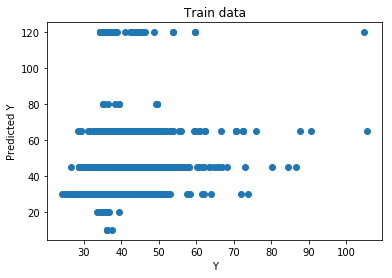

In [69]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_train, y_train)
plt.xlabel('Y')
plt.ylabel('Predicted Y')
plt.title('Train data')

We can see that this seems to be a problem of classifcation as most of the values in Delivery time seem to be repetitve.

# Performing Classification models:

Before doing that let's classify our dependent variable into some classes:

In [70]:
y_train['Delivery_Time'] = pd.cut(x=y_train['Delivery_Time'], bins=[0, 25, 60, 85, 150],
                                   labels=["within 25 mins", "25-60 mins", "More than an hour", "Very Late"])
y_train['Delivery_Time'].value_counts()

25-60 mins           8049
More than an hour     758
Very Late              48
within 25 mins         20
Name: Delivery_Time, dtype: int64

In [71]:
y_test['Delivery_Time'] = pd.cut(x=y_test['Delivery_Time'], bins=[0, 25, 60, 85, 150],
                                   labels=["within 25 mins", "25-60 mins", "More than an hour", "Very Late"])
y_test['Delivery_Time'].value_counts()

25-60 mins           2022
More than an hour     179
Very Late              14
within 25 mins          4
Name: Delivery_Time, dtype: int64

# Performing SVM:

In [72]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=0)
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#### Accuracy (training):

In [73]:
acc_train = svc.score(x_train, y_train)*100
print('Accuracy of training set is ', round(acc_train, 2), '%')

Accuracy of training set is  90.78 %


#### Accuracy (testing):

In [74]:
acc_test = svc.score(x_test, y_test)*100
print('Accuracy of testing set is ', round(acc_test, 2), '%')

Accuracy of testing set is  91.12 %


# Performing Decision Tree:

In [75]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Accuracy (training):

In [76]:
acc_train1 = classifier.score(x_train, y_train)*100
print('Accuracy of training set is ', round(acc_train1, 2), '%')

Accuracy of training set is  99.7 %


#### Accuracy (testing):

In [77]:
acc_test1 = classifier.score(x_test, y_test)*100
print('Accuracy of testing set is ', round(acc_test1, 2), '%')

Accuracy of testing set is  88.15 %


# Performing Random Forest:

In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Accuracy (training):

In [79]:
acc_train2 = model.score(x_train, y_train)*100
print('Accuracy of training set is ', round(acc_train2, 2), '%')

Accuracy of training set is  98.73 %


#### Accuracy (testing):

In [80]:
acc_test2 = model.score(x_test, y_test)*100
print('Accuracy of testing set is ', round(acc_test2, 2), '%')

Accuracy of testing set is  92.79 %
